In [1]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('../15_modified_data/final_data.csv')
data.head()

,Unnamed: 0.2,Unnamed: 0,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,pickup_centroid_location,dropoff_centroid_location,date,Unnamed: 0.1
0,0,196731,2018-11-01 19:45:00,2018-11-01T20:00:00.000,576.0,2.691298,8,24,7.5,0,2.5,False,1,"{'type': 'Point', 'coordinates': [-87.62887415...","{'type': 'Point', 'coordinates': [-87.66495391...",2018-11-01,NaN
1,1,164547,2018-11-01 18:00:00,2018-11-01T18:00:00.000,500.0,1.572838,61,68,5.0,0,2.5,False,1,"{'type': 'Point', 'coordinates': [-87.65916659...","{'type': 'Point', 'coordinates': [-87.64249752...",2018-11-01,NaN
2,2,97519,2018-11-01 12:30:00,2018-11-01T12:45:00.000,503.0,1.813330,2,77,7.5,0,0.0,True,2,"{'type': 'Point', 'coordinates': [-87.69501258...","{'type': 'Point', 'coordinates': [-87.66341640...",2018-11-01,NaN
3,3,105166,2018-11-01 13:15:00,2018-11-01T13:30:00.000,1444.0,10.235455,32,1,17.5,5,2.5,False,1,"{'type': 'Point', 'coordinates': [-87.62519214...","{'type': 'Point', 'coordinates': [-87.67016685...",2018-11-01,NaN
4,4,91326,2018-11-01 12:00:00,2018-11-01T12:00:00.000,388.0,0.833294,8,32,5.0,0,2.5,False,1,"{'type': 'Point', 'coordinates': [-87.63186394...","{'type': 'Point', 'coordinates': [-87.62197165...",2018-11-01,NaN


In [4]:
test = pd.read_csv('../15_modified_data/test_data.csv')
test.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip'],
      dtype='object')

In [10]:
y = test['nonzero_tip']

In [26]:
y.value_counts()

0    19710
1     4206
Name: nonzero_tip, dtype: int64

In [11]:
X = test.drop(['trip_start_timestamp', 'trip_end_timestamp', 'date', 'nonzero_tip'], axis=1)
X.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'pickup_community_name',
       'dropoff_community_name', 'year', 'month', 'day', 'day_of_week', 'hour',
       'weekend'],
      dtype='object')

In [12]:
xmatches = pd.get_dummies(test, columns = ['dropoff_community_name', 'pickup_community_name'])

In [13]:
xmatches.drop(['tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)


In [14]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
xmatches['month_int'] = xmatches['month'].map(month_map)

In [15]:
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
xmatches['day_ofweek_int'] = xmatches['day_of_week'].map(day_map)
xmatches['day_ofweek_int'].value_counts()


6    4350
5    4065
4    3361
7    3313
3    3121
2    2965
1    2741
Name: day_ofweek_int, dtype: int64

In [16]:
xmatches.drop(['day_of_week', 'month' ], axis=1, inplace=True)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(xmatches, y, test_size=0.2, random_state=0)

In [19]:
log = LogisticRegression()
log.fit(X_train, y_train)
ypred = log.predict(X_test)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(ypred, y_test)

0.9611204013377926

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [23]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
ypred2 = log.predict(X_test)
ypred2
accuracy_score(ypred2, y_test)

0.9611204013377926

In [24]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)
accuracy_score(y_predKNN, y_test)

0.8024665551839465

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
precision_score(y_test, ypred, average='macro')

0.9375098249153664

In [29]:
precision_score(y_test, ypred, average='micro')

0.9611204013377926

In [30]:
precision_score(y_test, ypred, average='weighted')

0.9607313804334942

In [32]:
confusion_matrix(y_test, y_pred)

array([[3944,    0],
       [   0,  840]])

In [35]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3944
           1       0.90      0.87      0.89       840

    accuracy                           0.96      4784
   macro avg       0.94      0.93      0.93      4784
weighted avg       0.96      0.96      0.96      4784



In [42]:
test1 = pd.read_csv('../15_modified_data/test_data.csv')
test1.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip'],
      dtype='object')

In [46]:
tip_count_0, tip_count_1 = test1['nonzero_tip'].value_counts()

In [47]:
tip_count_0

19710

In [52]:
tip_0 = test1[test1['nonzero_tip'] == 0]

In [53]:
tip_1 = test1[test1['nonzero_tip'] == 1]

In [54]:
print('tip 0:', tip_0.shape)
print('tip 1:', tip_1.shape)

tip 0: (19710, 19)
tip 1: (4206, 19)


In [55]:
tip_count_1 / (tip_count_1 + tip_count_0)

0.17586552935273458

In [56]:
tip_count_0 / (tip_count_1 + tip_count_0)

0.8241344706472654

In [57]:
tip_0_under = tip_0.sample(tip_count_1)


In [59]:
len(tip_0_under)

4206

In [61]:
test_under = pd.concat([tip_0_under, tip_1], axis=0)
# test_under


In [62]:
print("total class of 1 and0:",test_under['nonzero_tip'].value_counts())# plot the count after under-sampeling


total class of 1 and0: 0    4206
1    4206
Name: nonzero_tip, dtype: int64


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# import altair as alt

<AxesSubplot:title={'center':'count (target)'}>

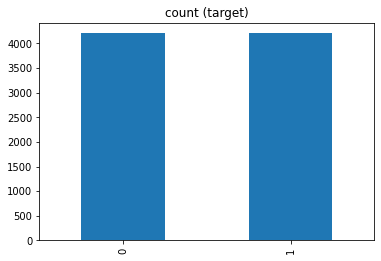

In [67]:
test_under['nonzero_tip'].value_counts().plot(kind='bar', title='count (target)')


In [103]:
test_under.head()
len(test_under)

8412

In [105]:
test_under['nonzero_tip'].value_counts()

0    4206
1    4206
Name: nonzero_tip, dtype: int64

In [76]:
# overesample
tip_1_over = tip_1.sample(tip_count_0, replace=True)


In [77]:
test_over = pd.concat([tip_1_over, tip_0], axis=0)


In [78]:
print("total class of 1 and 0:",test_over['nonzero_tip'].value_counts())# plot the count after under-sampeling


total class of 1 and 0: 1    19710
0    19710
Name: nonzero_tip, dtype: int64


In [106]:
len(test_over)

39420

<AxesSubplot:title={'center':'count (target)'}>

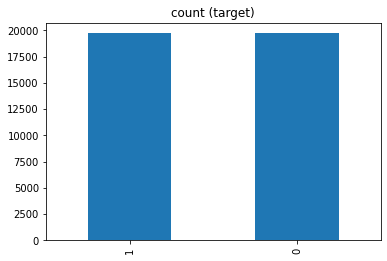

In [79]:
test_over['nonzero_tip'].value_counts().plot(kind='bar', title='count (target)')


In [83]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler


In [84]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable


In [86]:
x_rus, y_rus = rus.fit_resample(X_train, y_train)


In [88]:
import collections


In [89]:
print('original dataset shape:', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_rus))

original dataset shape: Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 3366, 1: 3366})


In [90]:
from imblearn.over_sampling import RandomOverSampler


In [92]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_ros))

Original dataset shape Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 15766, 1: 15766})


In [93]:
from imblearn.under_sampling import TomekLinks


In [100]:
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(X_train, y_train)
print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_tl))


Original dataset shape Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 14474, 1: 3366})


In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 15766, 1: 15766})
